# Quickstart tutorial

Welcome to the quickstart tutorial to Esmraldi! If you have comments or suggestions, please don’t hesitate to reach out. 
This tutorial contains the key steps of the imaging processing workflow leading to the joint analysis of a MALDI image with another image. It uses a basic MALDI dataset along with a synthetic image. 

## Input, Visualization

The data is available in the `data` directory. 
First, read the data and display the spectrum of the first pixel:

(9, 2, 8399)


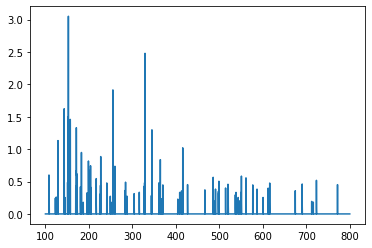

In [61]:
import sys, os
rootpath = "../../"
sys.path.append(os.path.join(os.path.dirname(os.path.abspath("__file__")), rootpath))

import esmraldi.imzmlio as io
import matplotlib.pyplot as plt

imzml = io.open_imzml(rootpath + "data/Example_Continuous.imzML")
spectra = io.get_spectra(imzml)

print(spectra.shape)
mz_first, intensities_first = spectra[0, 0], spectra[0, 1]
plt.plot(mz_first, intensities_first)

The variable `spectra` is a 3D numpy array, where the first dimension corresponds to pixels, the second dimension to *m/z* or intensities, and the last dimension to their associated values. Here, this array contains 9 pixels, and each spectrum has 8399 points.

Then, we display the image of the ion of *m/z* 328.9 +/- 0.25:

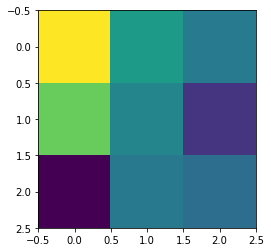

In [45]:
image = io.get_image(imzml, 328.9, 0.25)
plt.imshow(image)

The image is a 3x3 array of various intensities.

## Spectra processing

The next step is to detect peaks across all spectra. Our approach is based on [topographical prominence](https://en.wikipedia.org/wiki/Topographic_prominence) values. More specifically, we define the **local** prominence as the ratio between the priminence and the estimated local noise in the signal. The local noise $\sigma$ is estimated as the median absolute deviations in a window of length *wlen*. Let *f* be the local prominence factor, the local maxima whose intensity is above $f * \sigma$ are considered as peaks.

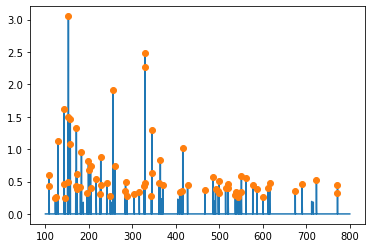

In [60]:
import esmraldi.spectraprocessing as sp
import numpy as np

prominence_local_factor = 4
window_length = 1000

detected_mzs = sp.spectra_peak_mzs_adaptative(spectra, factor=prominence_local_factor, wlen=window_length)
detected_mz_first = detected_mzs[0]
indices = np.in1d(mz_first, peaks_first_pixel)
detected_intensities_first = intensities_first[indices]

plt.plot(mz_first, intensities_first, peaks_first_pixel, detected_intensities_first, "o")

The original spectrum is displayed in blue, and the detected peaks are highlighted by orange dots.